In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train.shape

(50000, 1)

# Visualize Data

[4]


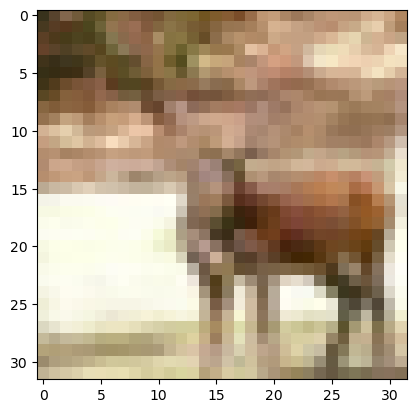

In [8]:
i = 1001
plt.imshow(X_train[i])
print(y_train[i])

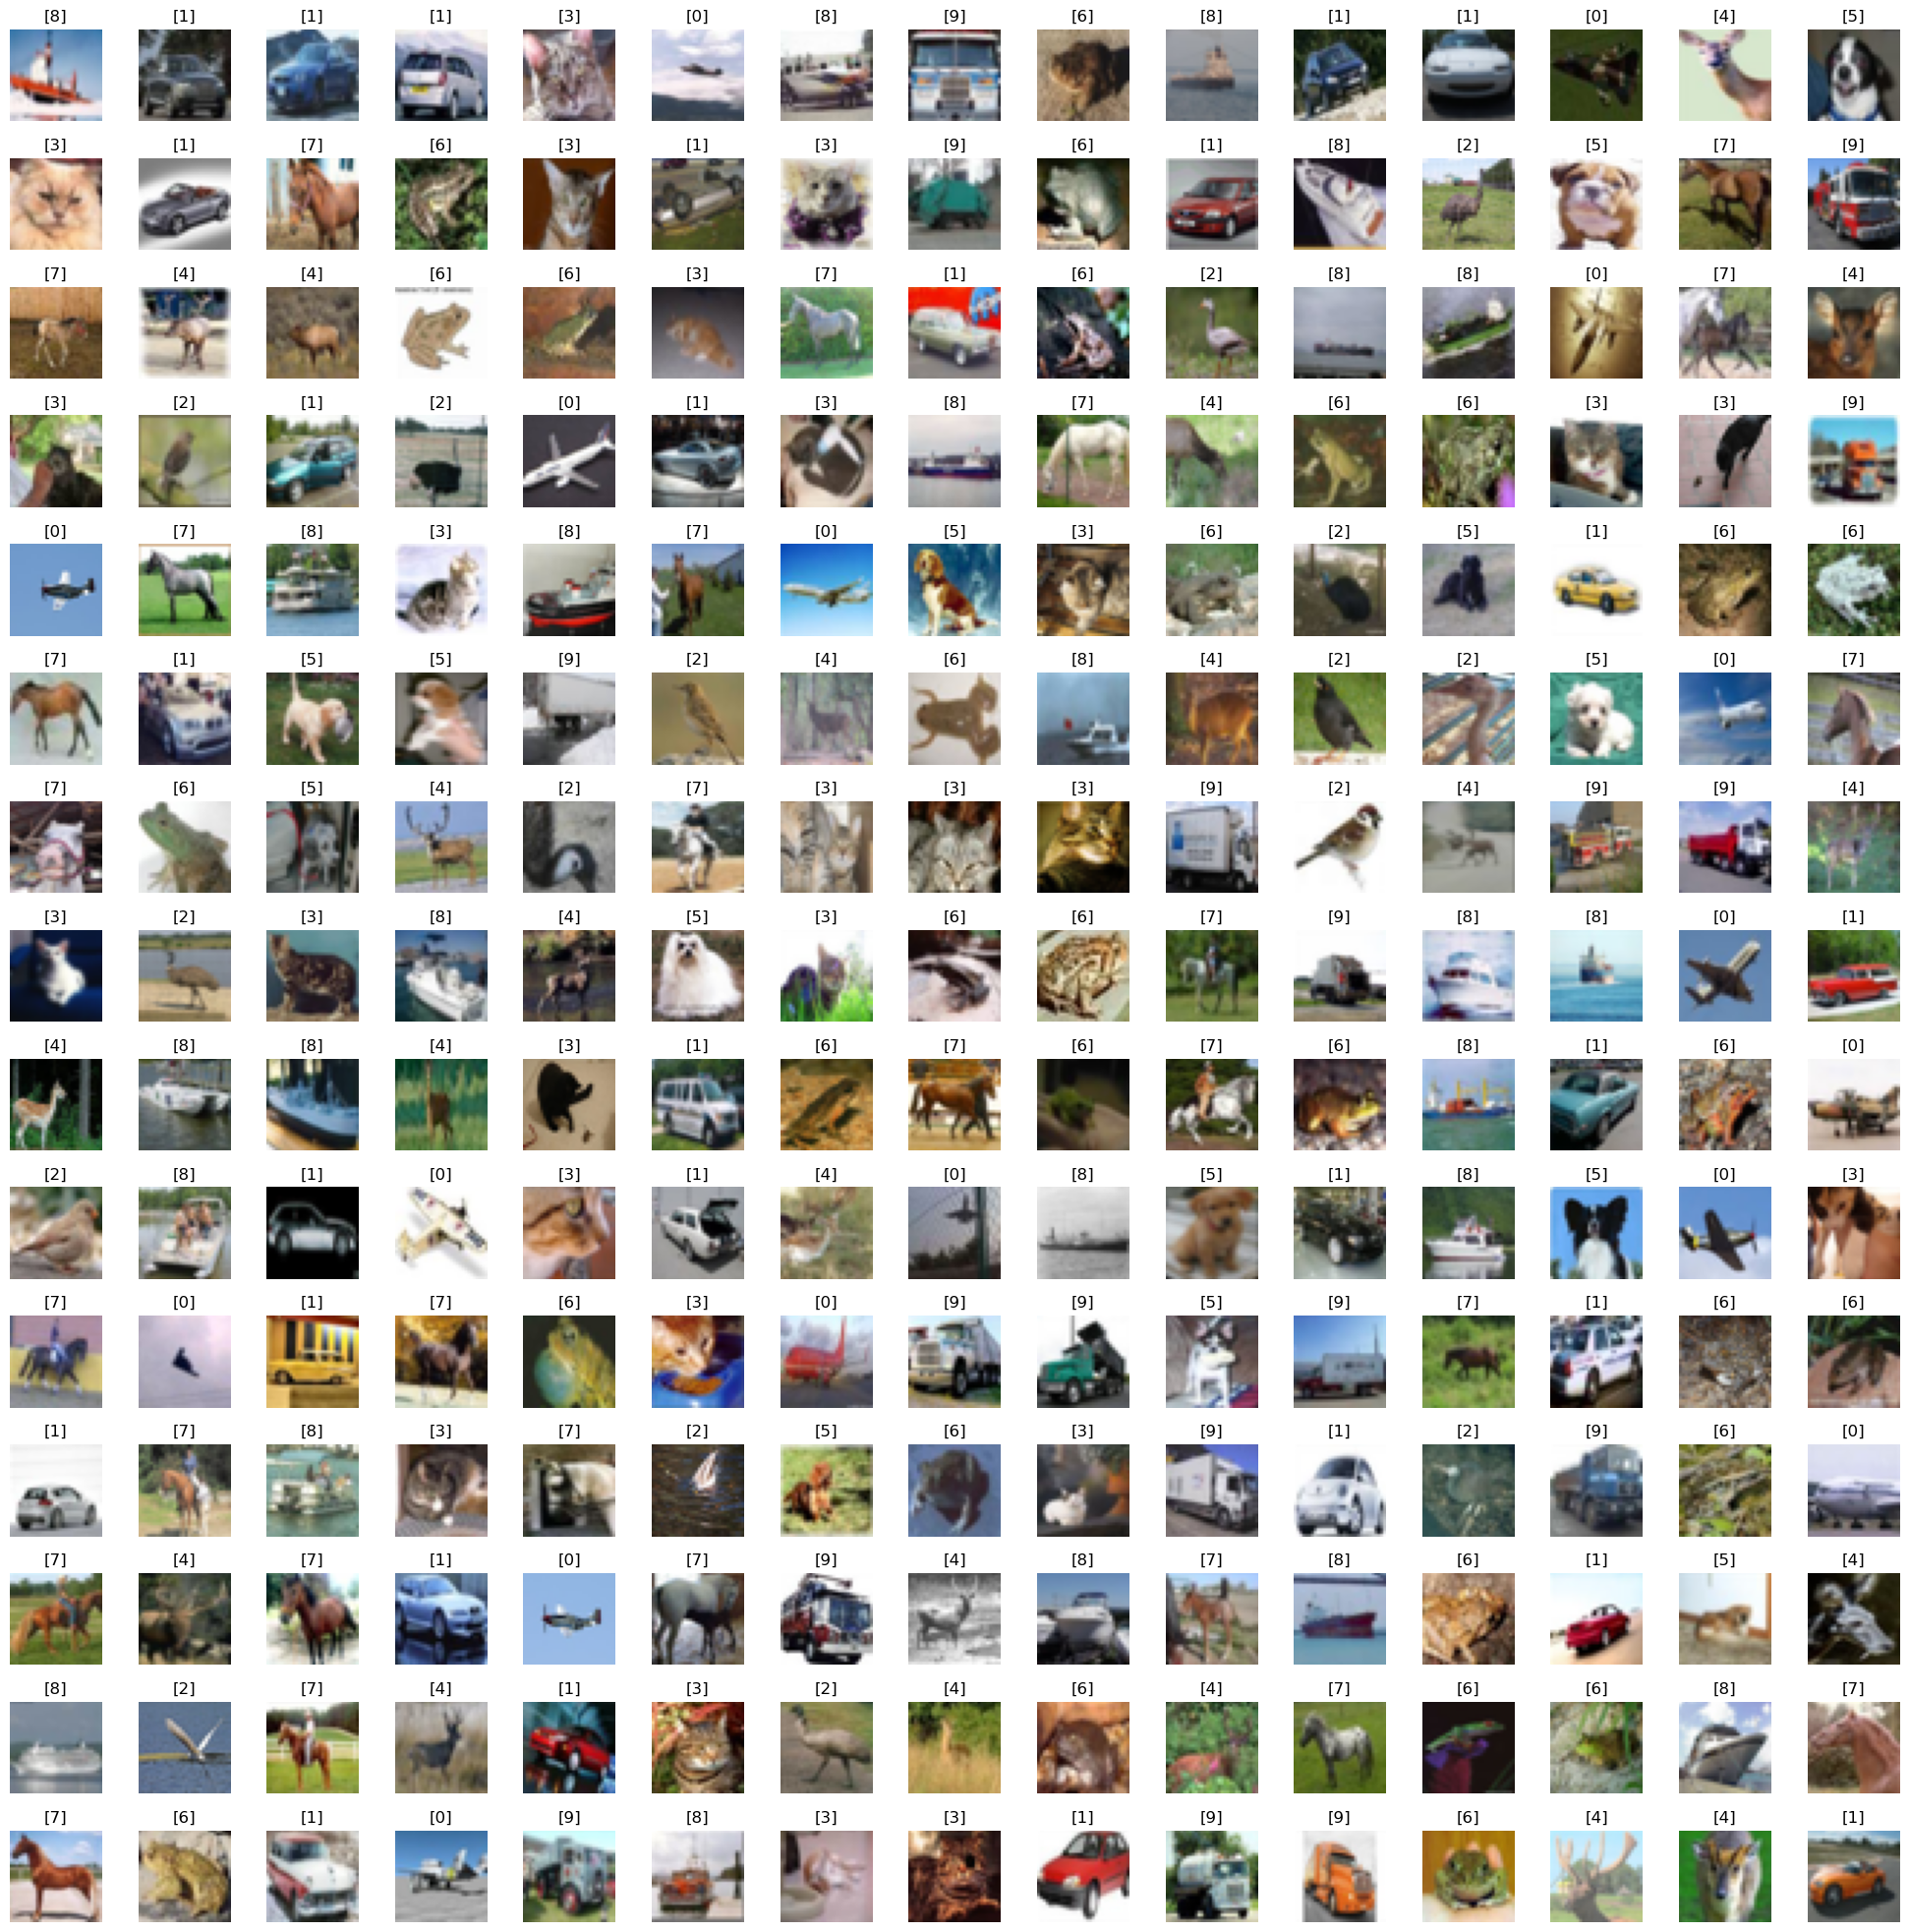

In [9]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])

    axes[i].set_title(y_train[index])

    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [10]:
n_training

50000

# Data Preparation

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
number_cat = 10


In [14]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
y_test = keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [17]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [24]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.3315 - loss: 1.8237
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 123ms/step - accuracy: 0.5504 - loss: 1.2753
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 107ms/step - accuracy: 0.6167 - loss: 1.0956
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.6633 - loss: 0.9858
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 136ms/step - accuracy: 0.6809 - loss: 0.9348


# Evaluating the Model


In [26]:
evaluation = cnn_model.evaluate(X_test,y_test)
print(f"Test Accuracy : {evaluation}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6760 - loss: 0.9390
Test Accuracy : [0.9407175779342651, 0.6748999953269958]


In [27]:
predictions = cnn_model.predict(X_test)
predicted_class = np.argmax(predictions, axis=1)

predicted_class

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [28]:
y_test = y_test.argmax(1)

In [29]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

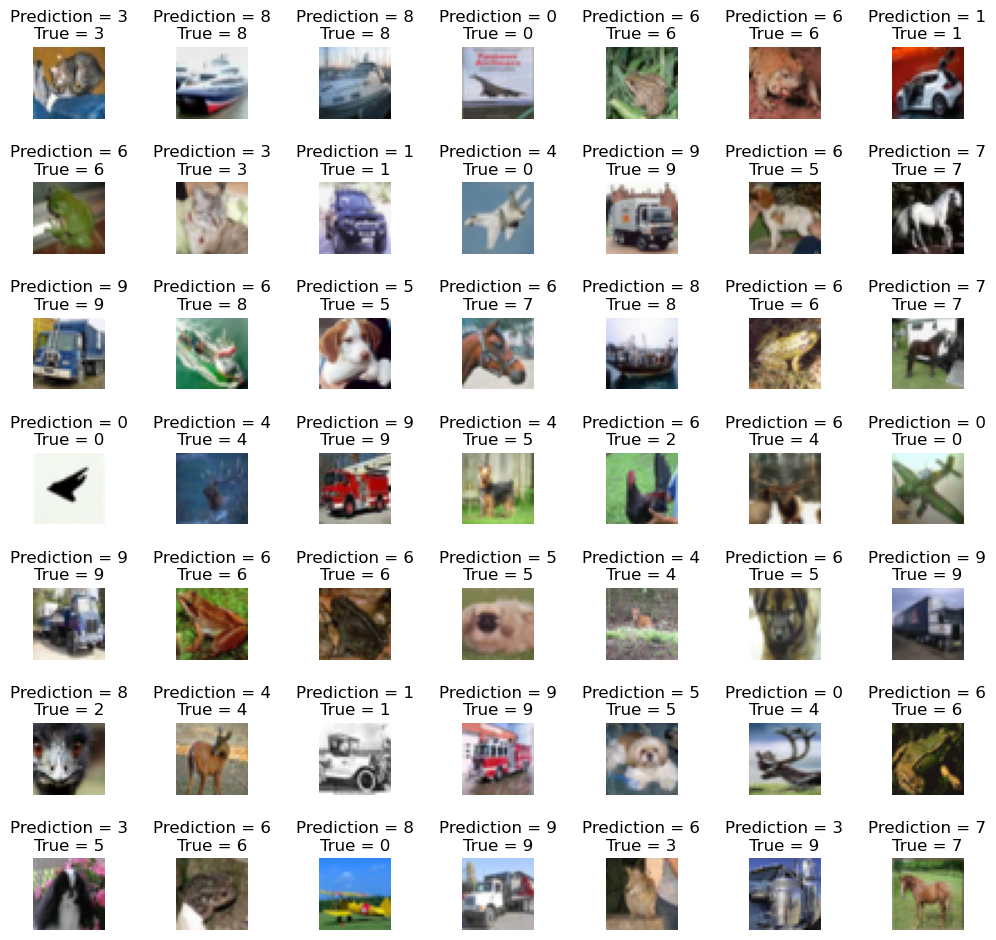

In [30]:
L=7
W=7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(predicted_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_class)
cm

array([[793,  13,  11,   5,  22,   2,  13,   0, 133,   8],
       [ 19, 865,   0,   2,   4,   1,  25,   0,  57,  27],
       [119,   6, 412,  41, 168,  26, 187,   5,  33,   3],
       [ 43,   7,  57, 396, 121,  77, 239,  10,  44,   6],
       [ 32,   2,  16,  35, 709,   5, 156,  14,  28,   3],
       [ 30,   7,  49, 162, 102, 466, 143,  13,  24,   4],
       [  7,   1,  14,  14,  34,   2, 913,   0,  12,   3],
       [ 59,   5,  59,  53, 132,  42,  66, 567,   8,   9],
       [ 38,   6,   2,   2,   2,   2,  11,   1, 930,   6],
       [ 53, 120,   4,   6,   9,   3,  41,   3,  63, 698]], dtype=int64)

<Axes: >

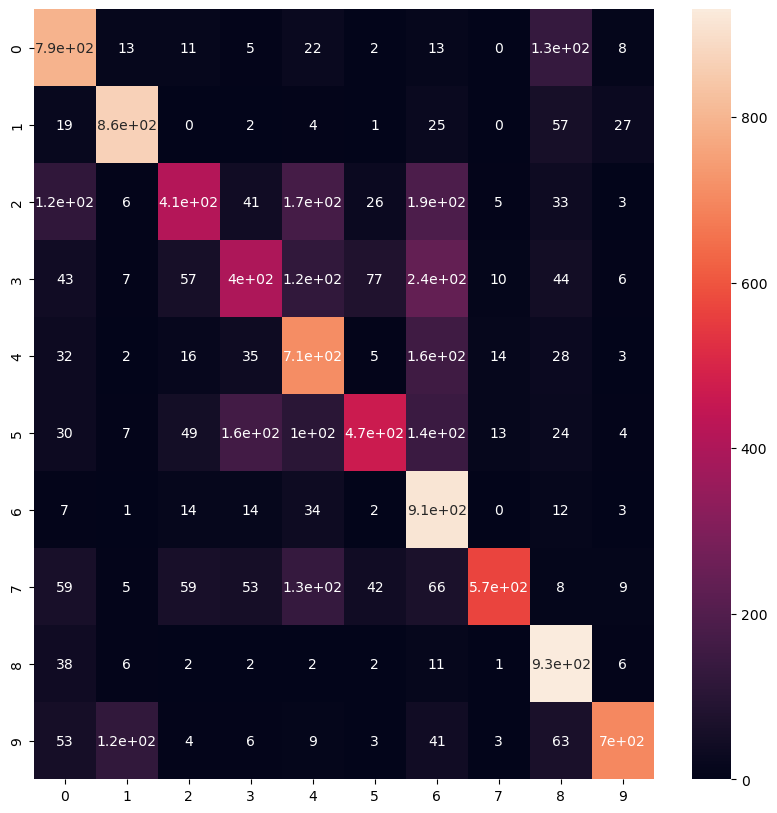

In [32]:
plt.figure(figsize =(10,10))
sns.heatmap(cm, annot = True)

# Saving the Model

In [34]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'Alpha_keras_cifar10_trained_model.h5')
cnn_model.save(model_path)


# Data Augmentation 

In [36]:
# (X_train ,y_train),(X_test,y_test) = cifar10.load_data()

In [37]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train.shape

In [38]:
# n = 15
# X_train_sample = X_train[:n]
# X_train_sample.shape

In [39]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# dataget_train = ImageDataGenerator(rotation_range=90)

# dataget_train = ImageDataGenerator(vertical_flip = True)
# dataget_train = ImageDataGenerator(height_shift_range = 0.5)
# dataget_train = ImageDataGenerator(brightness_range=(1, 3))

# dataget_train.fit(X_train_sample)

In [40]:
# from PIL import Image

# dataget_train = ImageDataGenerator(rotation_range=90)
# dataget_train.fit(X_train_sample)

# fig = plt.figure(figsize=(20, 2))  

# for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
#     for i in range(n):
#         ax = fig.add_subplot(1, n, i + 1)
#         img = Image.fromarray((x_batch[i]).astype(np.uint8))
#         ax.imshow(img)
#         ax.axis('off')
#     fig.suptitle('Augmented Image')
#     plt.show()
#     break


# Model Training Using Augemented Dataset

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
)

In [44]:
datagen.fit(X_train)

In [45]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/32


C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 117ms/step - accuracy: 0.3862 - loss: 1.7334
Epoch 2/32
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.4441 - loss: 1.5662
Epoch 3/32
1271/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.4631 - loss: 1.5292

KeyboardInterrupt: 

In [50]:
# score = cnn_model.evaluate(X_test, y_test)
# print('Test accuracy',score[1])

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [52]:
from tensorflow.keras.utils import to_categorical

y_test_cat = to_categorical(y_test, num_classes=10)
score = cnn_model.evaluate(X_test, y_test_cat)
print('Test accuracy:', score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5530 - loss: 1.2413
Test accuracy: 0.5493000149726868


In [54]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'Alpha_augmented_keras_cifar10_trained_model.h5')
cnn_model.save(model_path)